In [53]:
%matplotlib inline
import numpy as np
import pylab
from scipy.stats import norm
import matplotlib.mlab as mlab
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from operator import itemgetter
import pandas as pd
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
from matplotlib.ticker import AutoMinorLocator
from sklearn.neighbors import KernelDensity
from scipy.optimize import curve_fit
from IPython.display import display
#import importlib
#importlib.reload(norm)

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [202]:
#from pylab import *

def plotfig4(filename, title, graphname, col):
    x = []
    y = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    path = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"

    filename = path + filename
    with open(filename, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            x.append(words)   ## read the whole data set in x
            y.append(words[6]) ## read the ccs values in y
    
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)

    y = np.array(y).astype(np.float)
    n, bins, patches = plt.hist(y, bins='auto', color= col, label= graphname, normed=1, alpha=0.75 ) #normed = 1
                # best fit of data
    (mu, sigma) = norm.fit(y)
    y_fit = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y_fit, 'r--', linewidth=2)
              
    graphname = path + graphname + ".tiff"    
    plt.xlabel('Theoretical CCS ($\AA$)', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    plt.title(title + ' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)
    plt.savefig(graphname, dpi = 300)

    plt.show()

def plotfig3(filename, title, graphname, col):
    x = []
    y = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    path = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"

    filename = path + filename
    with open(filename, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            x.append(words)   ## read the whole data set in x
            y.append(words[5]) ## read the ccs values in y
    
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)

    y = np.array(y).astype(np.float)
    n, bins, patches = plt.hist(y, bins='auto', color= col, label= graphname, normed=1, alpha=0.75 ) #normed = 1
                # best fit of data
    (mu, sigma) = norm.fit(y)
    y_fit = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y_fit, 'r--', linewidth=2)
              
    graphname = path + graphname + ".tiff"    
    plt.xlabel('Theoretical CCS ($\AA$)', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    plt.title(title + ' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)
    plt.savefig(graphname, dpi = 300)

    plt.show()
    
def plotfig3_filter(filename, title, graphname, col, limitup, limitdown):
    x = []
    y = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    path = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"

    filename = path + filename
    with open(filename, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            if (float(words[5]) >= limitdown and float(words[5]) <= limitup ): 
                x.append(words)   ## read the whole data set in x
                y.append(words[5]) ## read the ccs values in y
    
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)

    y = np.array(y).astype(np.float)
    n, bins, patches = plt.hist(y, bins='auto', color= col, label= graphname, normed=1, alpha=0.75 ) #normed = 1
                # best fit of data
    (mu, sigma) = norm.fit(y)
    y_fit = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y_fit, 'r--', linewidth=2)
              
    graphname = path + graphname + ".tiff"    
    plt.xlabel('Theoretical CCS ($\AA$)', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    plt.title(title + ' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)
    plt.savefig(graphname, dpi = 300)

    plt.show()

def plotfig3_bimodal(filename, title, graphname, col, limit, expected):
    
    
    def gauss(x,mu,sigma,A):
        return A * exp(-(x-mu)**2/2/sigma**2)

    def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
        #return (A1 * math.exp(-(x-mu1)**2/2/sigma1**2) + A2 * math.exp(-(x-mu2)**2/2/sigma2**2))
        return (gauss(x,mu1,sigma1,A1) + gauss(x,mu2,sigma2,A2))

    x = []
    y = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    path = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"

    filename = path + filename
    with open(filename, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            if (float(words[5]) >= limit): 
                #print(float(words[5]))
                x.append(words)   ## read the whole data set in x
                y.append(words[5]) ## read the ccs values in y
    
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)

    y = np.array(y).astype(np.float)
    n, bins, patches = plt.hist(y, bins='auto', color= col, label= graphname, normed =1, alpha=0.75 ) #normed = 1
                # best fit of data
    #print(n, bins)
    bins=(bins[1:]+bins[:-1])/2 # for len(x)==len(y)
    
    
    params,cov=curve_fit(bimodal,bins, n, expected)
    sigma=sqrt(diag(cov))
    #print(bins, params)
    plt.plot(bins,bimodal(bins,*params), 'r--',lw=2,label='model')
    #print(params,'\n',sigma) 
              
    graphname = path + graphname + ".tiff"    
    plt.xlabel('Theoretical CCS ($\AA$)', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    plt.title(title + ' ($\\mu1=%.3f,\ \sigma1=%.3f$, \n $\\mu2=%.3f,\ \sigma2=%.3f$,)' %(params[0], params[1], params[3], params[4] ), fontsize=16)
    plt.savefig(graphname, dpi = 300)

    plt.show()
       

In [272]:
def ccscluster_together(graphname, clustdf, maxcluster, plotcluster, col, minnum):
        #(fig, subplots) = plt.subplots(1, maxcluster, figsize=(8*maxcluster, 8))
    print(maxcluster)    
    #plt.xticks(np.arange(610, 680, 10))
    #plt.yticks(np.arange(0, 60, 20))
    colorlist = ['blue', 'green', 'black', 'red']
    params = np.empty((2, 2))
    plt.subplots(1, 1, figsize=(6, 4))
    if maxcluster > 1:
        #plotcluster = 10
        j = 1
        for i in range(1, maxcluster + 1):
            newdb = clustdf['ccs'].loc[(clustdf['clusterID'] == i)]
            if (len(newdb) > minnum): 

                plt.xticks(np.arange(380, 410, 10))
                plt.yticks(np.arange(0, 0.11, 0.02))
                #ax.set_xticks([610, 630, 650, 670])
                #ax.set_yticks([0, 20, 40, 60])
                plt.xlim(xmin = 380, xmax = 410)
                plt.ylim(ymin = 0, ymax = 0.11)
                plt.xlabel('Theoretical CCS ($\AA$)', fontsize=24)
                if j == 1: 
                    plt.ylabel('Probability', fontsize=24)
                #ax.xaxis.set_minor_locator(AutoMinorLocator(4))
                #ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                y = clustdf['ccs'].loc[(clustdf['clusterID'] == i)]
                n, bins, patches = plt.hist(y, bins='auto', color= colorlist[j-1], normed=1, alpha=0.75 ) #normed = 1
                # best fit of data
                (mu, sigma) = norm.fit(y)
                y_fit = mlab.normpdf(bins, mu, sigma)
                plt.plot(bins, y_fit, '--', color =  colorlist[j+1],  linewidth=2)
                structures = str(clustdf['ccs'][clustdf['clusterID'] == i].count())
                params[j-1][0] = mu; params[j-1][1] = sigma; 
  
                #plt.title(title + ' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)

                #ax.hist(clustdf['ccs'].loc[(clustdf['clusterID'] == i)], bins='auto', color = col, normed = 1, alpha= 0.5 )
                #display(clustdf.loc[(clustdf['clusterID'] == i)])
                #ax.set_title(str(clustdf['ccs'][clustdf['clusterID'] == i].count()) + " structures")
                j += 1
            else: print(len(newdb))
            #plt.show()
            #plt.savefig(graphname + str(j) + '.tiff', dpi = 300)
    else:
        plt.hist(clustdf['ccs'].loc[(clustdf['clusterID'] == maxcluster)], bins='auto', color = col)
    #plt.show()
    #ax.set_title(' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)
    plt.title(' ($\\mu1=%.3f,\ \sigma1=%.3f$, \n $\\mu2=%.3f,\ \sigma2=%.3f$,)' %(params[0][0],params[0][1], \
                params[1][0],params[1][1]), fontsize=18)
    plt.savefig(graphname, dpi = 300)
    pylab.savefig(graphname , dpi = 300)



def ccscluster_plot(graphname, clustdf, maxcluster, plotcluster, col, minnum):
        #(fig, subplots) = plt.subplots(1, maxcluster, figsize=(8*maxcluster, 8))
    print(maxcluster)    
    #plt.xticks(np.arange(610, 680, 10))
    #plt.yticks(np.arange(0, 60, 20))
    j = 1
    (fig, axs) = plt.subplots(1, plotcluster, figsize=(8*plotcluster, 8))
    if maxcluster > 1:
        #plotcluster = 10
        j = 1
        for i in range(1, maxcluster + 1):
            newdb = clustdf['ccs'].loc[(clustdf['clusterID'] == i)]
            if (len(newdb) > minnum): 
                ax = axs[j -1] #plt.subplots(figsize=(8, 8))
                #ax = plt
                ax.set_xticks(np.arange(380, 410, 10))
                ax.set_yticks(np.arange(0, 0.11, 0.02))
                #ax.set_xticks([610, 630, 650, 670])
                #ax.set_yticks([0, 20, 40, 60])
                ax.set_xlim(xmin = 380, xmax = 410)
                ax.set_ylim(ymin = 0, ymax = 0.11)
                ax.set_xlabel('Theoretical CCS ($\AA$)', fontsize=24)
                if j == 1: 
                    ax.set_ylabel('Probability', fontsize=24)
                #ax.xaxis.set_minor_locator(AutoMinorLocator(4))
                #ax.yaxis.set_minor_locator(AutoMinorLocator(4))
                y = clustdf['ccs'].loc[(clustdf['clusterID'] == i)]
                n, bins, patches = ax.hist(y, bins='auto', color= col, normed=1, alpha=0.6 ) #normed = 1
                # best fit of data
                (mu, sigma) = norm.fit(y)
                y_fit = mlab.normpdf(bins, mu, sigma)
                ax.plot(bins, y_fit, 'r--', linewidth=2)
                structures = str(clustdf['ccs'][clustdf['clusterID'] == i].count())
                ax.set_title(' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)
  
                #plt.title(title + ' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)

                #ax.hist(clustdf['ccs'].loc[(clustdf['clusterID'] == i)], bins='auto', color = col, normed = 1, alpha= 0.5 )
                #display(clustdf.loc[(clustdf['clusterID'] == i)])
                #ax.set_title(str(clustdf['ccs'][clustdf['clusterID'] == i].count()) + " structures")
                j += 1
            else: print(len(newdb))
            #plt.show()
            #plt.savefig(graphname + str(j) + '.tiff', dpi = 300)
    else:
        plt.hist(clustdf['ccs'].loc[(clustdf['clusterID'] == maxcluster)], bins='auto', color = col)
    #plt.show()
    plt.savefig(graphname, dpi = 300)
    pylab.savefig(graphname, dpi = 300)

def ccscluster(cluster, ccs, graphname, col, form, plotcluster, minnum):
    ccslist = []
    clist = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    clusterpath = "/Users/pxq/Documents/data/li/daacp_alex/md/cluster/"
    ccspath = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"
    cluster = clusterpath + cluster
    ccs = ccspath + ccs
    graphname = clusterpath + graphname + '.tiff'
    
    with open(ccs, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            ccslist.append([int(words[3])] + [float(words[6])]) ## read the ccs values in y
    
    #ccslist = np.array(ccslist).astype(np.float)
    ccslist = sorted(ccslist, key=itemgetter(0))
    for x in range(1, ccslist[-1][0]):
        if x < ccslist[x-1][0]:
            ccslist.insert(x-1, [x-1, 0.0])
        
    #print(ccslist) 
    
    with open(cluster, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace(form, "=")
            line = line.replace('-', '=')
            line = line.replace(':', '=')
            line = line.replace(" ","")
            words = line.split("=")
            index = int(words[3])
            #print(index)
            if(index < len(ccslist) and index == int (ccslist[index -1][0])):
                if (ccslist[index-1][1] > 1):
                    clist.append([words[2]] + [words[3]] + [ccslist[index-1][1]]) ## read the ccs values in y
            elif(index >= len(ccslist)): 
                diff = index - int(ccslist[-1][0])
                print(len(ccslist))
                print(index + diff -1)
                if(int(words[3]) == ccslist[index + diff -1][0]):
                    if (ccslist[index + diff -1][1] > 0):
                        clist.append([words[2]] + [words[3]] + [ccslist[index + diff -1][1]])
                else: print("CCS not found for ID ", words[3])
            else:
                diff = index - int(ccslist[index-1][0])
                if(int(words[3]) == ccslist[index + diff -1][0]):
                    if (ccslist[index + diff -1][1] > 0): 
                        clist.append([words[2]] + [words[3]] + [ccslist[index + diff -1][1]])
                else: print("CCS not found for ID ", words[3])
                
                
            #print(words)
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)
    clist = np.array(clist).astype(np.float)
    clist = sorted(clist, key=itemgetter(0))
    maxcluster = int (clist[-1][0])
    #print(clist)
    
    clustdf = pd.DataFrame.from_records(clist, columns = ['clusterID', 'protein ID', 'ccs'])
    
    ccscluster_plot(graphname, clustdf, maxcluster, plotcluster, col, minnum)
    
def ccscluster_2(cluster, ccs, graphname, col, form, plotcluster, minnum):
    ccslist = []
    clist = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    clusterpath = "/Users/pxq/Documents/data/li/daacp_alex/md/cluster/"
    ccspath = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"
    cluster = clusterpath + cluster
    ccs = ccspath + ccs
    graphname = clusterpath + graphname + '.tiff'
    
    with open(ccs, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            ccslist.append([int(words[2])] + [float(words[5])]) ## read the ccs values in y
    
    #ccslist = np.array(ccslist).astype(np.float)
    ccslist = sorted(ccslist, key=itemgetter(0))
    for x in range(1, ccslist[-1][0]):
        if x < ccslist[x-1][0]:
            ccslist.insert(x-1, [x-1, 0.0])
        
    #print(ccslist) 
    
    with open(cluster, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace(form, "=")
            line = line.replace('-', '=')
            line = line.replace(':', '=')
            line = line.replace(" ","")
            words = line.split("=")
            index = int(words[3])
            #print(index)
            if(index < len(ccslist) and index == int (ccslist[index -1][0])):
                if (ccslist[index-1][1] > 1):
                    clist.append([words[2]] + [words[3]] + [ccslist[index-1][1]]) ## read the ccs values in y
            elif(index >= len(ccslist)): 
                diff = index - int(ccslist[-1][0])
                print(len(ccslist))
                print(index + diff -1)
                if(int(words[2]) == ccslist[index + diff -1][0]):
                    if (ccslist[index + diff -1][1] > 0):
                        clist.append([words[2]] + [words[3]] + [ccslist[index + diff -1][1]])
                else: print("CCS not found for ID ", words[3])
            else:
                diff = index - int(ccslist[index-1][0])
                if(int(words[2]) == ccslist[index + diff -1][0]):
                    if (ccslist[index + diff -1][1] > 0): 
                        clist.append([words[2]] + [words[3]] + [ccslist[index + diff -1][1]])
                else: print("CCS not found for ID ", words[3])
                
                
            #print(words)
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)
    clist = np.array(clist).astype(np.float)
    clist = sorted(clist, key=itemgetter(0))
    maxcluster = int (clist[-1][0])
    #print(clist)
    
    clustdf = pd.DataFrame.from_records(clist, columns = ['clusterID', 'protein ID', 'ccs'])
    
    ccscluster_together(graphname, clustdf, maxcluster, plotcluster, col, minnum)

500
499
6
1
3
3


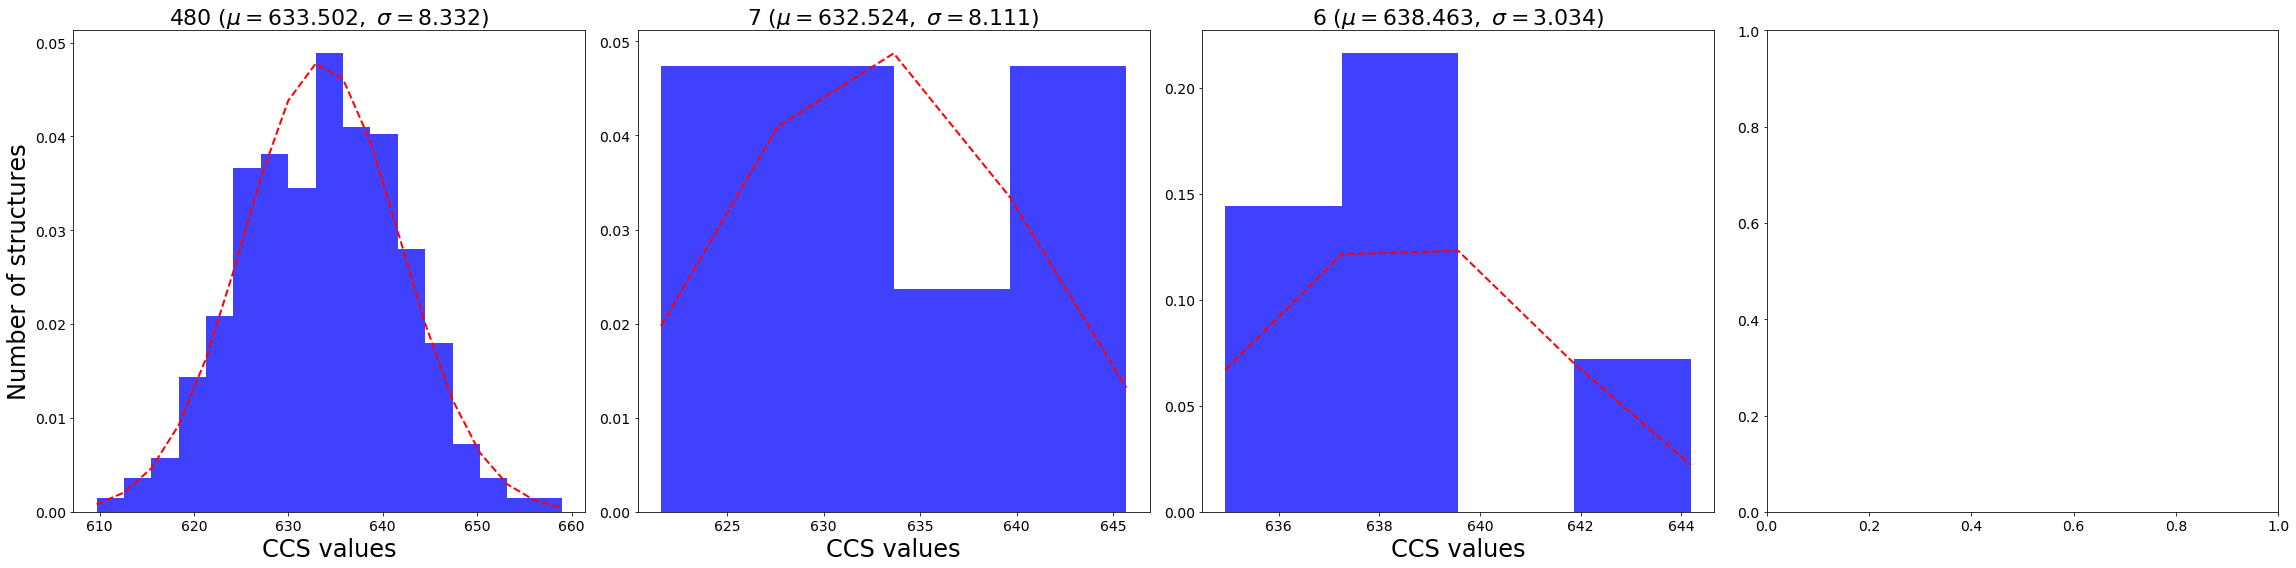

In [166]:
clustdf = ccscluster("acth-p5-d16lys_gas_c0.5_tm.out", "acth_p5_d16lys_tm_2.dat", "acth_p5_d16lys_cluster", "blue", "d16lys-", 4, 5 )

1001
1000
('CCS not found for ID ', '1001')
('CCS not found for ID ', '420')
('CCS not found for ID ', '421')
4
13
6


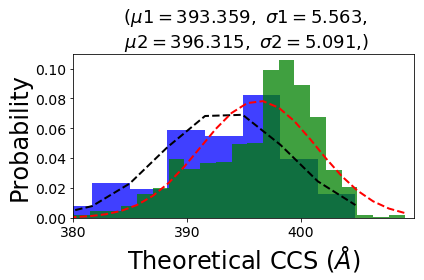

In [273]:
clustdf = ccscluster_2("neurosesin-p3-d11trp_gas_c0.4_rmsd.out", "neurosesin_p3_d11trp_pa_2.dat", \
                     "neurosesin_p3_d11trp", "blue", "d11trp-", 2, 15 )

In [158]:
def plot4_kdf(filename, title, graphname, col):
    x = []
    y = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    path = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"

    filename = path + filename
    with open(filename, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            x.append(words)   ## read the whole data set in x
            y.append(words[6]) ## read the ccs values in y
    
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)

    y = np.array(y).astype(np.float)
    #y = y.sort(axis = 0)

    n, bins, patches = plt.hist(y, bins='auto', color= col, label= graphname, normed=1, alpha=0.25 ) #normed = 1
                # best fit of data
    (mu, sigma) = norm.fit(y)
    y_fit = mlab.normpdf(bins, mu, sigma)
    
    plt.plot(bins, y_fit, 'r--', linewidth=2, label='Normal distribution')
    
    #plt.plot(y, '+k', c = 'black', label='input distribution')
    
    graphname = path + graphname + ".tiff"    
    plt.xlabel('Theoretical CCS', fontsize=24)
    plt.ylabel('Probability', fontsize=24)
    #plt.title(title + ' ($\\mu=%.3f,\ \sigma=%.3f$)' %(mu, sigma), fontsize=22)
    plt.savefig(graphname, dpi = 300)
    plt.show()
    
    #fig, ax = plt.subplots(1, 3)
    
    y_reshape = y[:, np.newaxis]
    y_reshape.sort(axis = 0)
    #print(y_reshape)
    i = 0
    for kernel in ['gaussian', 'tophat', 'epanechnikov']:
        fig, ax = plt.subplots()
        kde = KernelDensity(kernel=kernel, bandwidth=0.9).fit(y_reshape)
        log_dens = kde.score_samples(y_reshape)
        ax.fill(y_reshape, np.exp(log_dens), '-k', fc='#AAAAFF',  label="kernel = '{0}'".format(kernel))
        #ax.plot(y_reshape, np.exp(log_dens), 'o-', label="kernel = '{0}'".format(kernel))
        i += 1
        plt.show()

    #plt.show()





//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


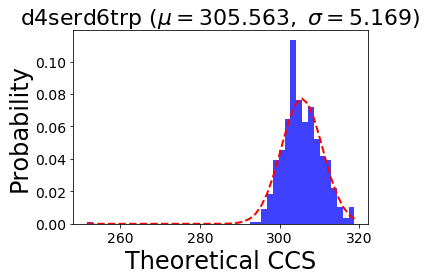

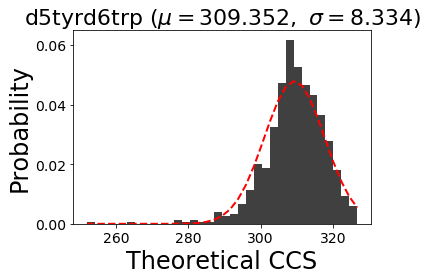

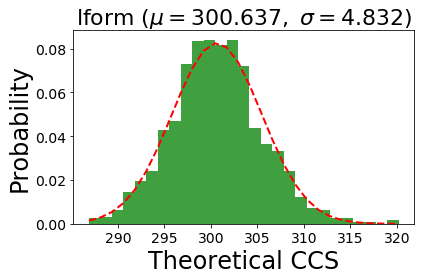

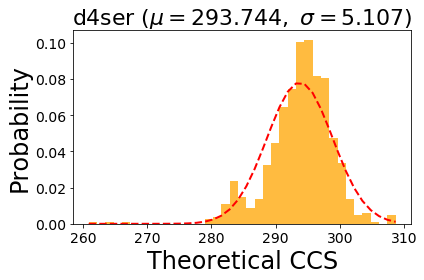

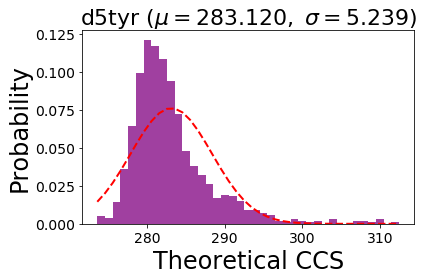

In [3]:
def lhrh_p2():
    prefix = "lhrh_p2_"
    titlenames = ["d4serd6trp", "d5tyrd6trp", "lform", "d4ser", "d5tyr" ]
    ccstypes = ["_tm", ]
    typename = "_tm"
    colornames = ['blue', 'black', 'green', 'orange', 'purple']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        #plt.xlim(xmin = 600, xmax = 680)
        #plt.ylim(ymin = 0, ymax = 0.06)
        plotfig3_filter(filename, titlename, graphname, color, 250)

lhrh_p2()

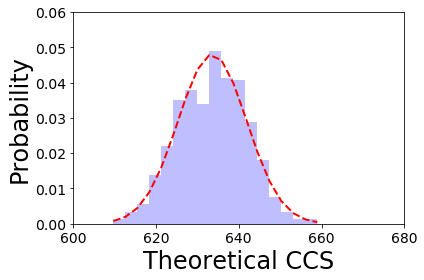

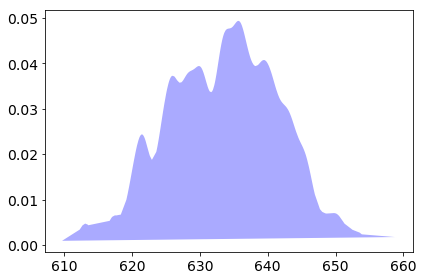

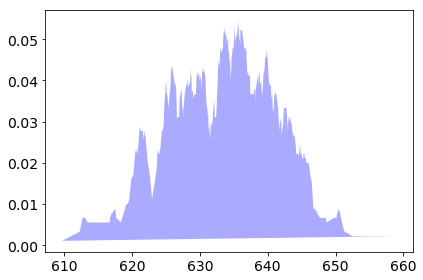

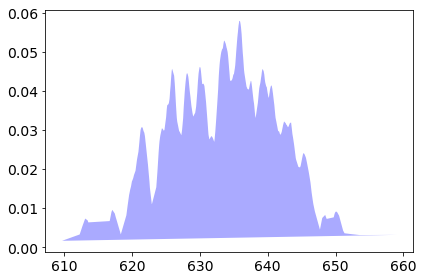

In [135]:

def acth_p5():
    prefix = "acth_p5_"
    titlenames = ["d16lys",] # "d1ser", "lform"]
    ccstypes = ["_tm", ]
    typename = "_tm"
    colornames = ['blue', 'black', 'green']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        plt.xlim(xmin = 600, xmax = 680)
        plt.ylim(ymin = 0, ymax = 0.06)
        plot4_kdf(filename, titlename + '_kdf', graphname + '_kdf', color)

acth_p5()



(array([  1.00596639e+00,   1.99515456e-01,   2.32599503e+02,
         1.98889914e+00,   1.94312814e-01,   1.18723739e+02]), '\n', array([  2.87756917e-03,   2.89423234e-03,   2.90503268e+00,
         5.56390352e-03,   5.59456413e-03,   2.94335794e+00]))


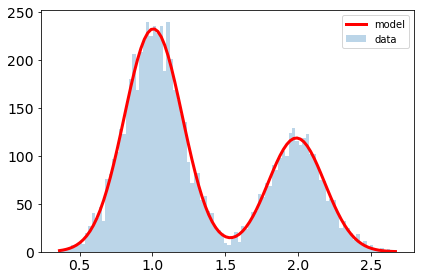

In [163]:
#from pylab import *

data=concatenate((normal(1,.2,5000),normal(2,.2,2500)))
y,x,_=hist(data,100,alpha=.3,label='data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(1,.2,250,2,.2,125)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)   

In [83]:
# Plot a 1D density example
N = 10
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 20)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))
#print(X)
print(X_plot)

[[ -5.        ]
 [ -4.21052632]
 [ -3.42105263]
 [ -2.63157895]
 [ -1.84210526]
 [ -1.05263158]
 [ -0.26315789]
 [  0.52631579]
 [  1.31578947]
 [  2.10526316]
 [  2.89473684]
 [  3.68421053]
 [  4.47368421]
 [  5.26315789]
 [  6.05263158]
 [  6.84210526]
 [  7.63157895]
 [  8.42105263]
 [  9.21052632]
 [ 10.        ]]


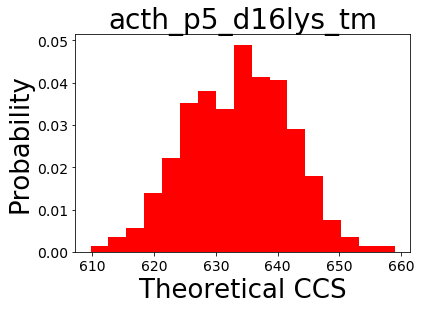

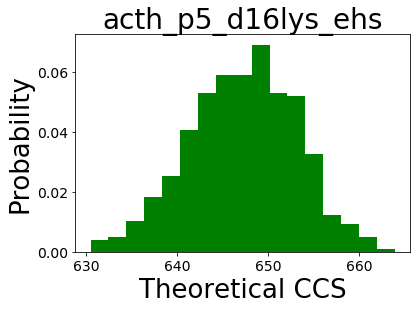

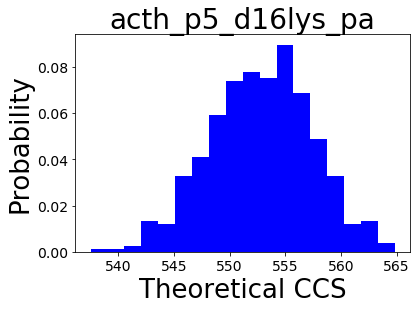

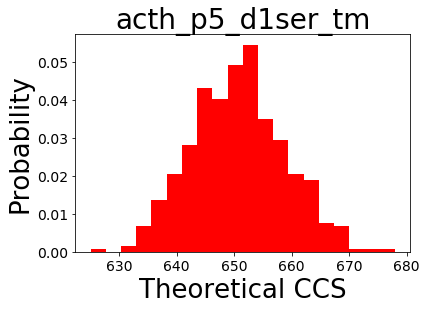

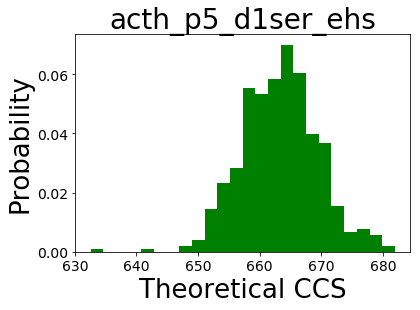

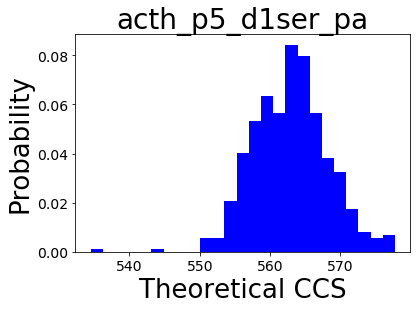

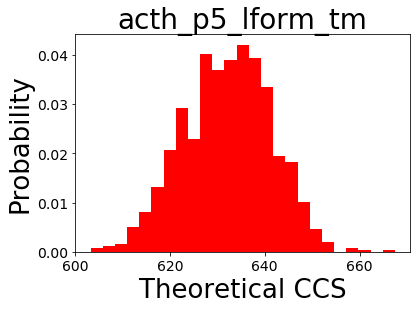

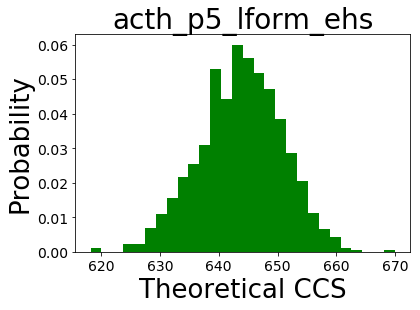

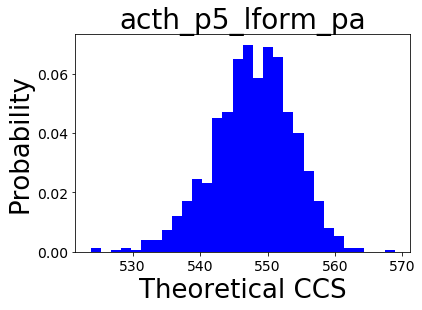

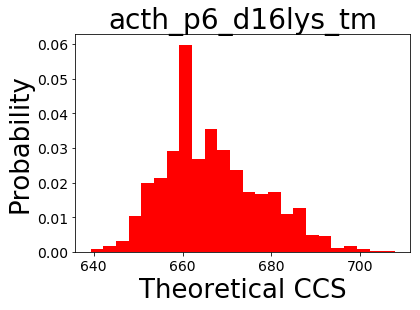

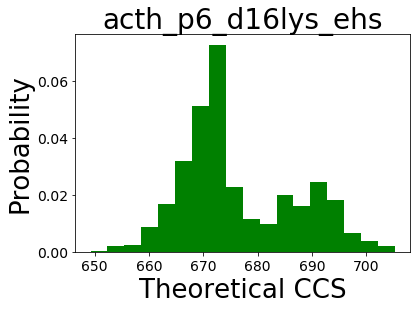

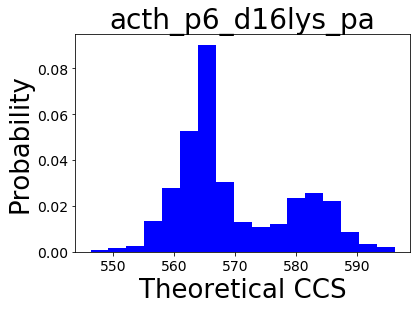

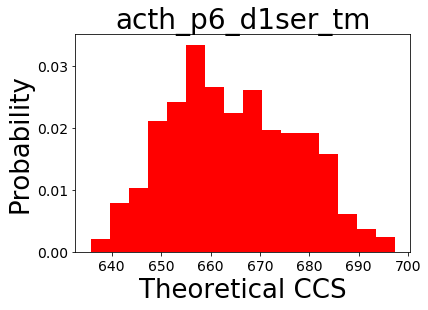

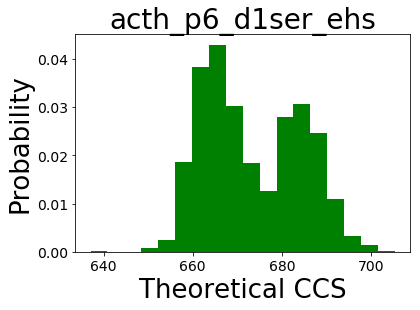

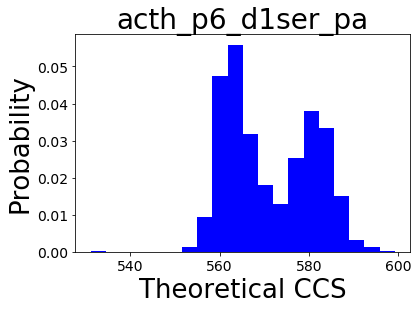

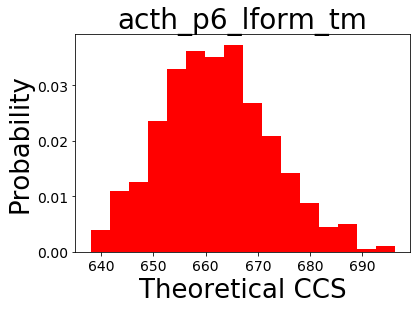

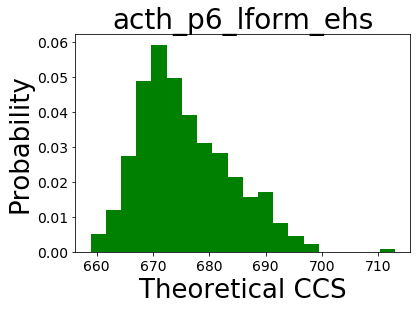

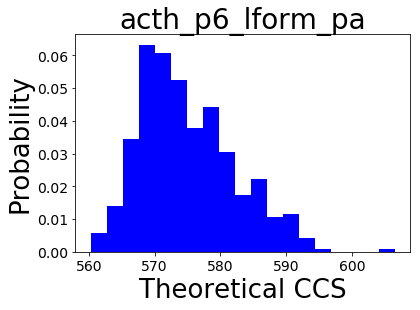

In [9]:

def main():
    titlenames = ["acth_p5_d16lys", "acth_p5_d1ser", "acth_p5_lform", "acth_p6_d16lys", "acth_p6_d1ser", "acth_p6_lform"]
    ccstypes = ["_tm", "_ehs", "_pa"]
    colornames = ['r', 'g', 'blue']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    for titlename in titlenames: 
            for typename, color in zip(ccstypes, colornames): 
                filename = titlename + typename +  "_2.dat"
                graphname = titlename + typename
                #print(filename, graphname, graphname, color)
                plotfig4(filename, graphname, graphname, color)

main()

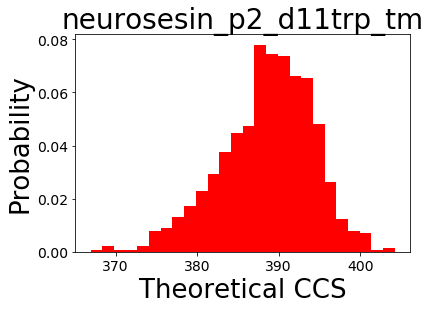

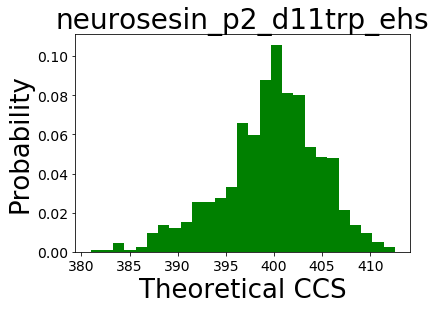

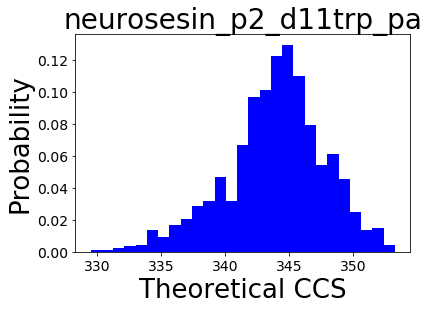

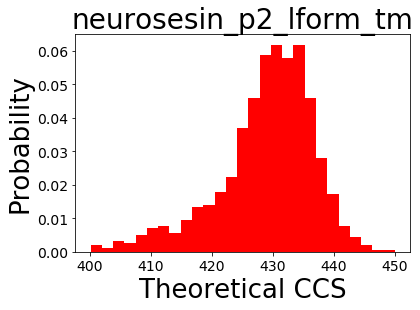

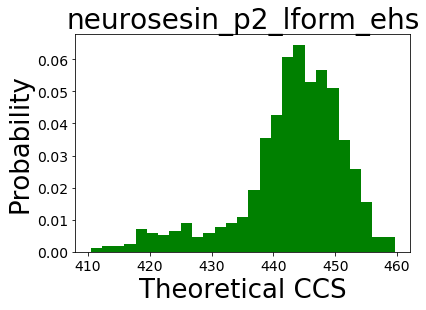

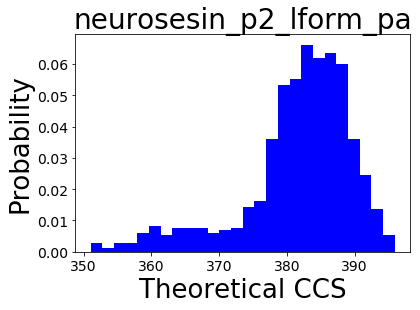

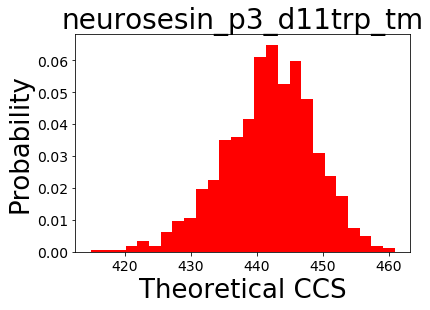

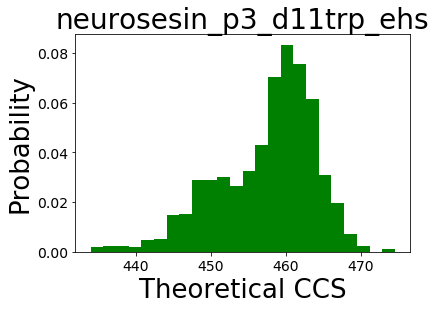

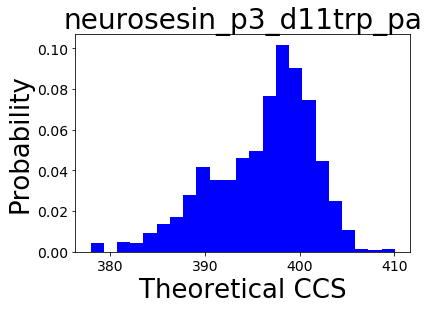

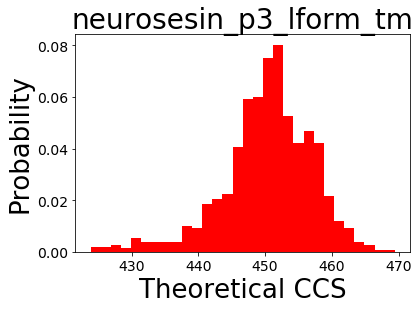

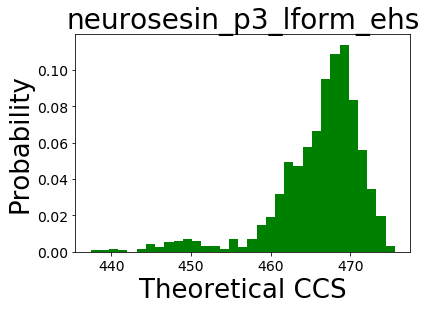

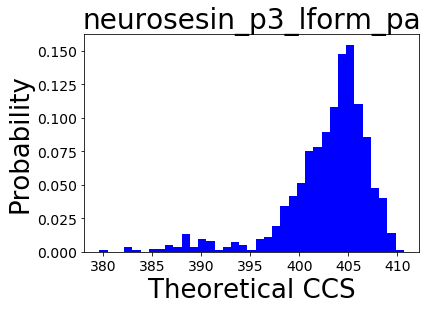

In [12]:


def plotfig3(filename, title, graphname, col):
    x = []
    y = []
    #path = "/Users/pxq/Documents/data/li/npy/ccs_mini/"
    path = "/Users/pxq/Documents/data/li/daacp_alex/md/ccs/"

    filename = path + filename
    with open(filename, 'r') as f:
        for line in f:
            line = line.replace('/', '=')
            line = line.replace('-', '=')
            words = line.split("=")
            x.append(words)   ## read the whole data set in x
            y.append(words[5]) ## read the ccs values in y
    
    # Create fake data and run it though `histogram` to get the experimental distribution
    #experimental = np.random.normal(10.0, 0.4, size=10000)
    #print(y)
    y = np.array(y).astype(np.float)
    plt.xlabel('Theoretical CCS', fontsize=26)
    plt.ylabel('Probability', fontsize=26)
    plt.title(title, fontsize=28)
    #print(y)
    
    plt.hist(y, bins='auto', color= col, label= graphname, normed=1, ) #normed = 1
    graphname = path + graphname + ".tiff"    
    plt.savefig(graphname, dpi = 300)

    plt.show()
    
def main():
    titlenames = ["neurosesin_p2_d11trp", "neurosesin_p2_lform", "neurosesin_p3_d11trp", "neurosesin_p3_lform"]
    ccstypes = ["_tm", "_ehs", "_pa"]
    colornames = ['r', 'g', 'blue']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    for titlename in titlenames: 
            for typename, color in zip(ccstypes, colornames): 
                filename = titlename + typename +  "_2.dat"
                graphname = titlename + typename
                #print(filename, graphname, graphname, color)
                plotfig3(filename, graphname, graphname, color)

main()



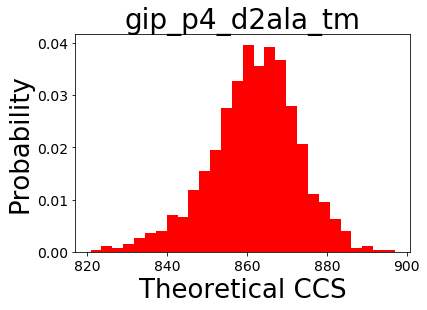

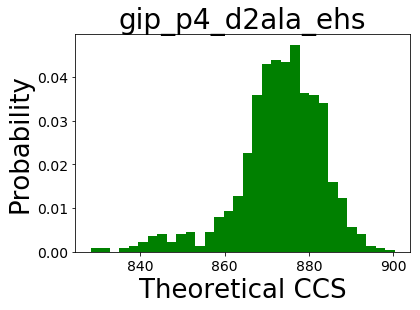

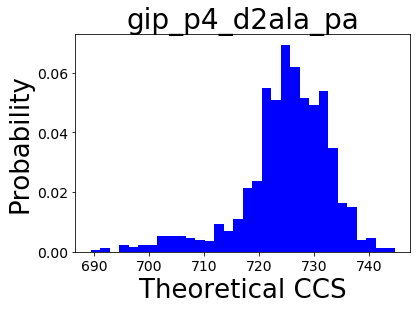

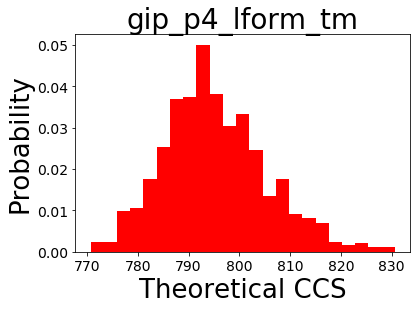

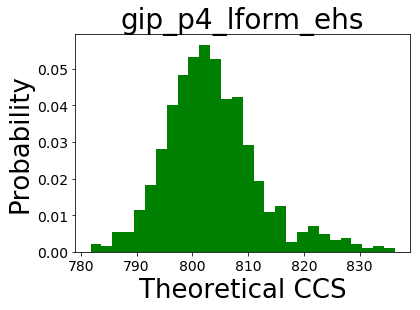

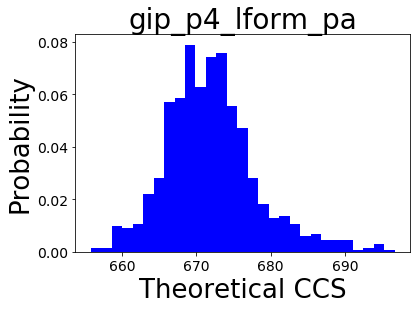

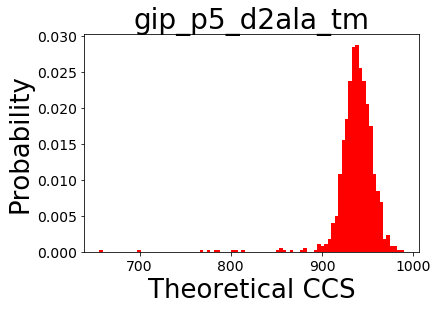

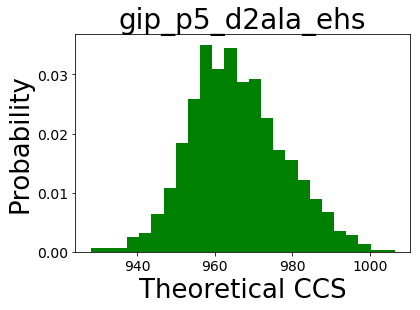

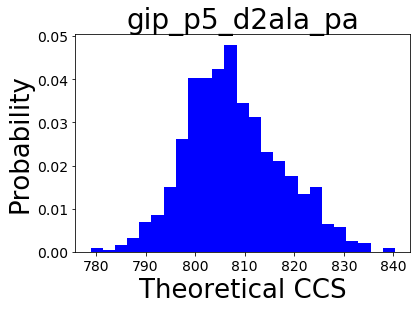

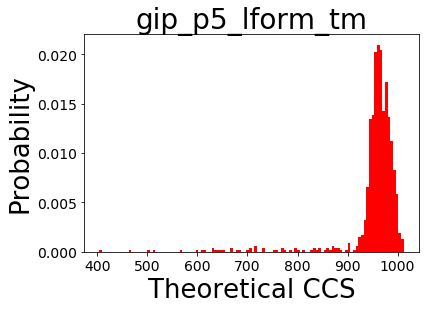

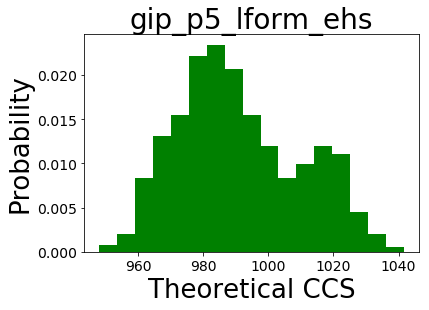

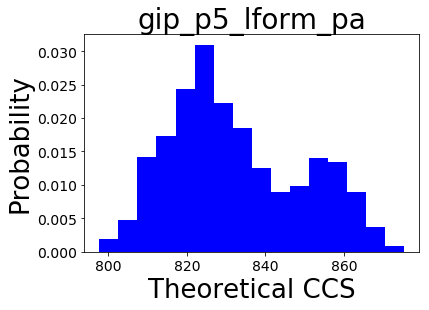

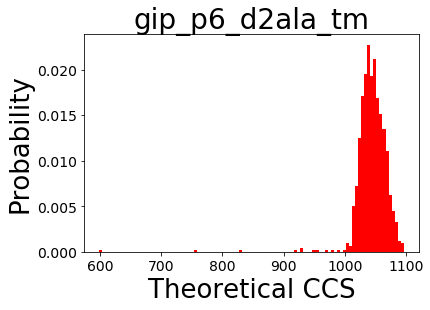

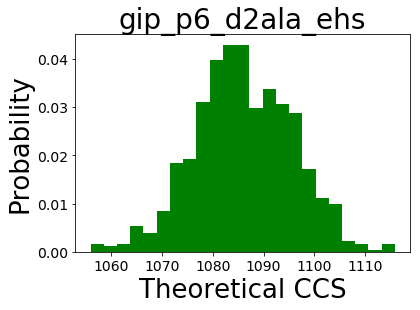

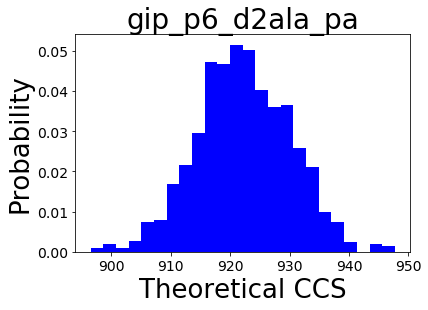

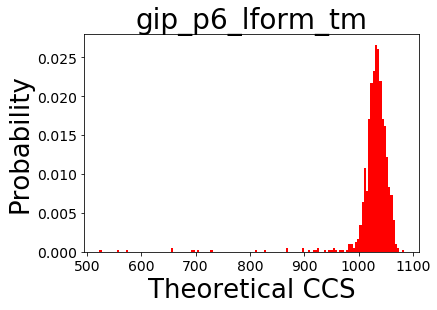

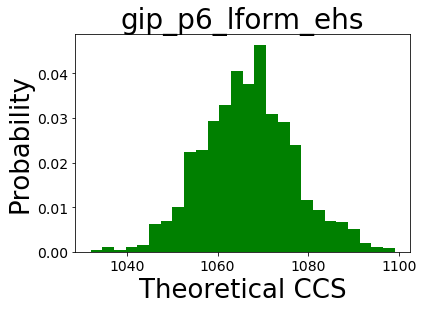

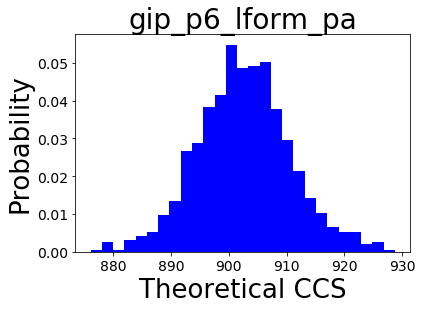

In [13]:
def main():
    titlenames = ["gip_p4_d2ala", "gip_p4_lform", "gip_p5_d2ala", "gip_p5_lform", "gip_p_d2ala", "gip_p5_lform"]
    ccstypes = ["_tm", "_ehs", "_pa"]
    colornames = ['r', 'g', 'blue']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    for titlename in titlenames: 
            for typename, color in zip(ccstypes, colornames): 
                filename = titlename + typename +  "_2.dat"
                graphname = titlename + typename
                #print(filename, graphname, graphname, color)
                plotfig3(filename, graphname, graphname, color)

main()



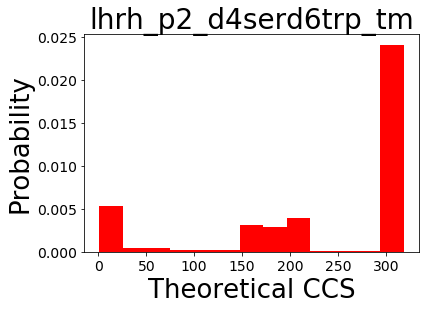

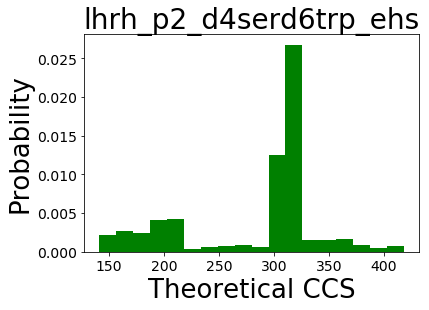

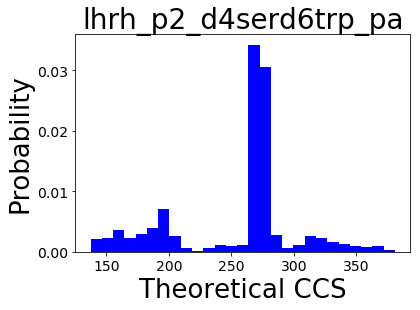

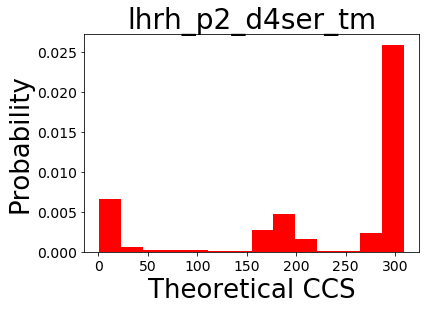

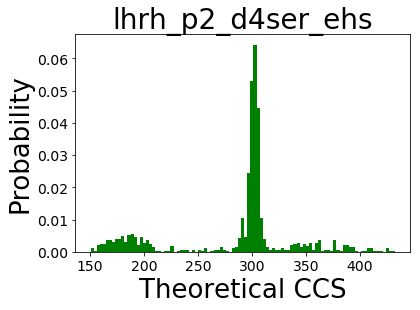

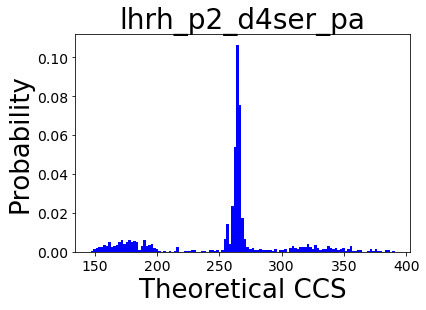

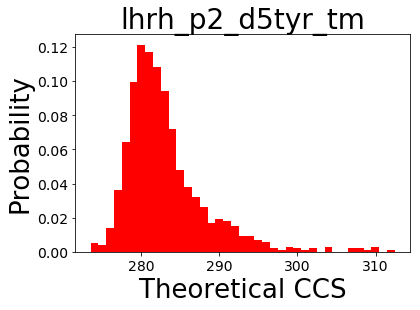

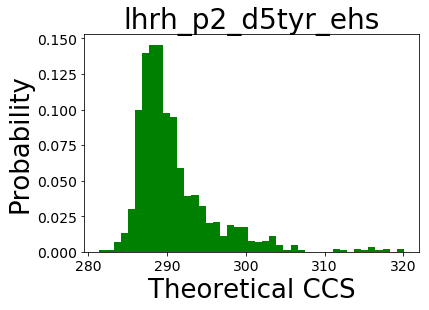

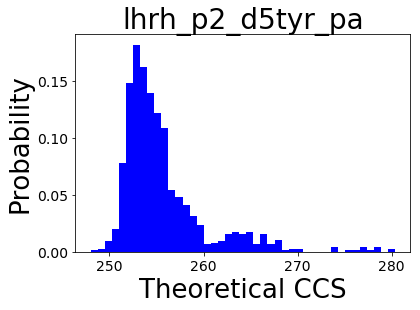

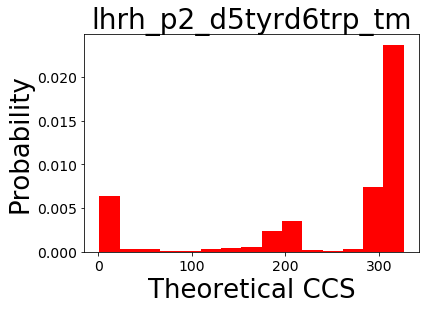

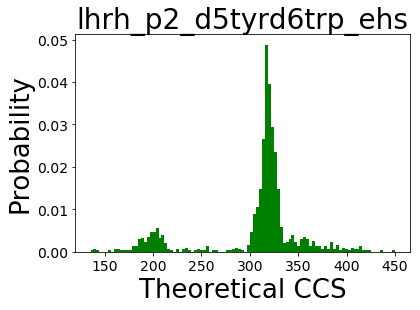

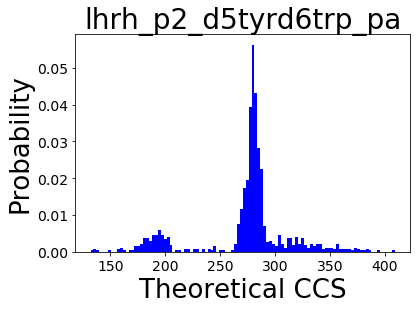

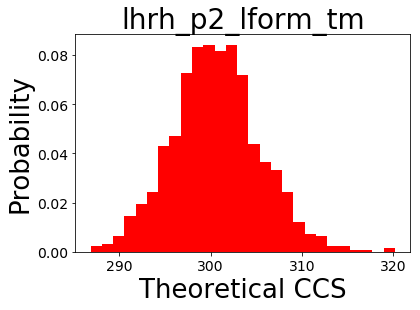

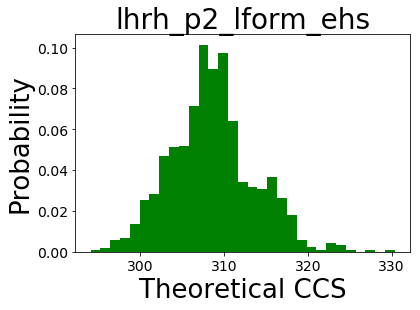

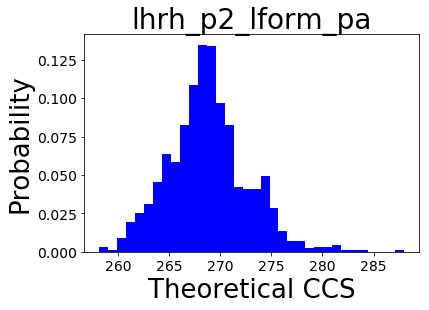

In [21]:
def main():
    titlenames = ["lhrh_p2_d4serd6trp", "lhrh_p2_d4ser", "lhrh_p2_d5tyr", "lhrh_p2_d5tyrd6trp", "lhrh_p2_lform"]
    ccstypes = ["_tm", "_ehs", "_pa"]
    colornames = ['r', 'g', 'blue']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    for titlename in titlenames: 
            for typename, color in zip(ccstypes, colornames): 
                filename = titlename + typename +  "_2.dat"
                graphname = titlename + typename
                #print(filename, graphname, graphname, color)
                plotfig3(filename, graphname, graphname, color)

main()




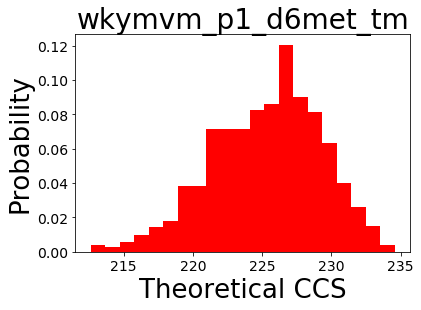

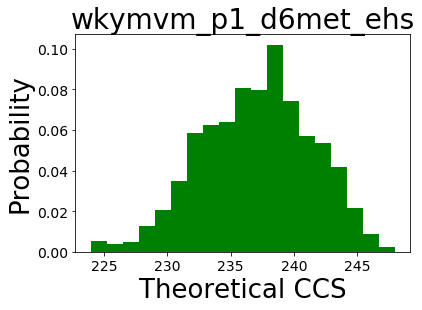

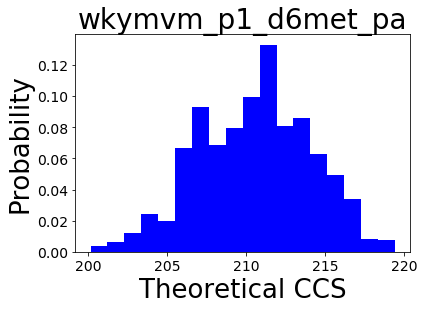

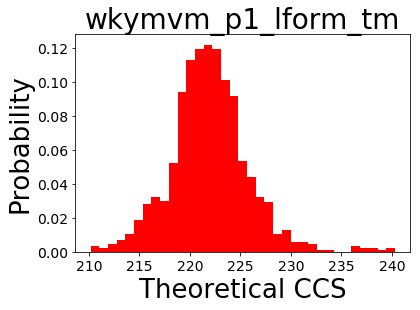

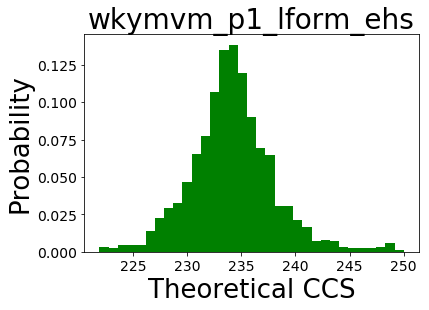

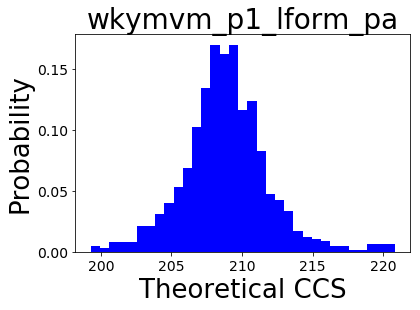

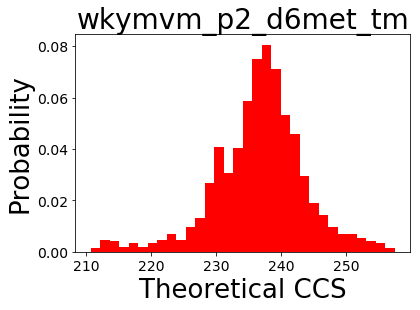

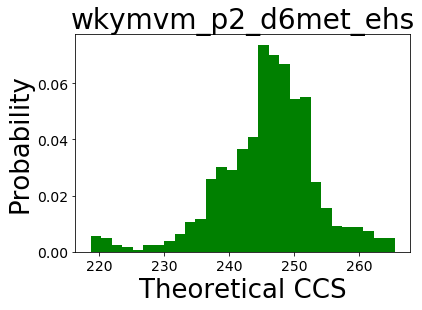

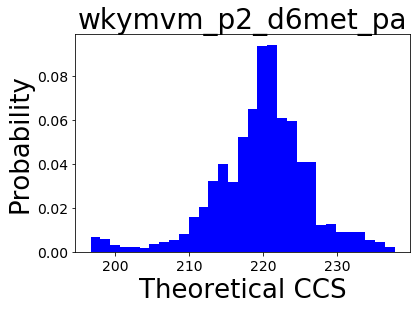

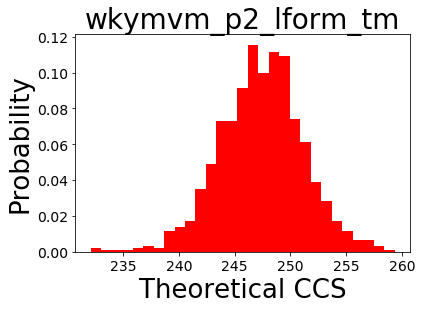

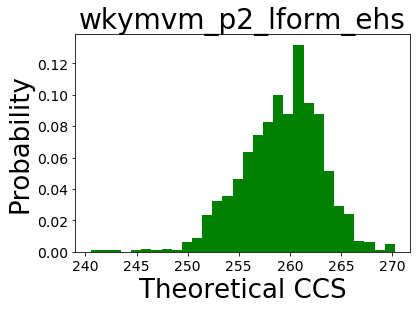

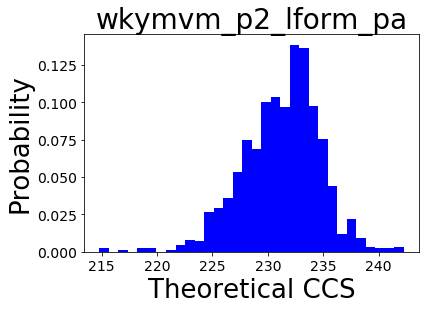

In [27]:
def main():
    titlenames = ["wkymvm_p1_d6met", "wkymvm_p1_lform", "wkymvm_p2_d6met", "wkymvm_p2_lform"]
    ccstypes = ["_tm", "_ehs", "_pa"]
    colornames = ['r', 'g', 'blue']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    for titlename in titlenames: 
            for typename, color in zip(ccstypes, colornames): 
                filename = titlename + typename +  "_2.dat"
                graphname = titlename + typename
                #print(filename, graphname, graphname, color)
                plotfig3(filename, graphname, graphname, color)

main()





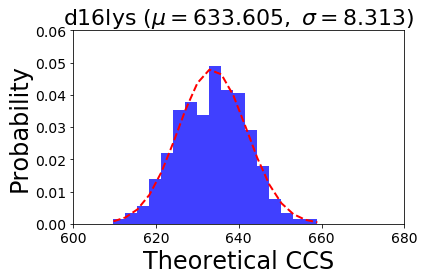

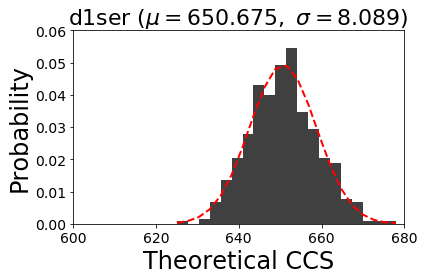

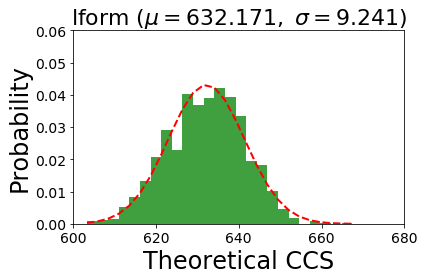

In [48]:
def acth_p5():
    prefix = "acth_p5_"
    titlenames = ["d16lys", "d1ser", "lform"]
    ccstypes = ["_tm", ]
    typename = "_tm"
    colornames = ['blue', 'black', 'green']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        plt.xlim(xmin = 600, xmax = 680)
        plt.ylim(ymin = 0, ymax = 0.06)
        plotfig4(filename, titlename, graphname, color)

acth_p5()

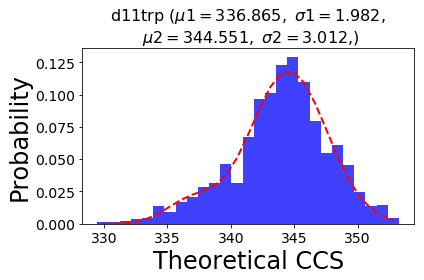

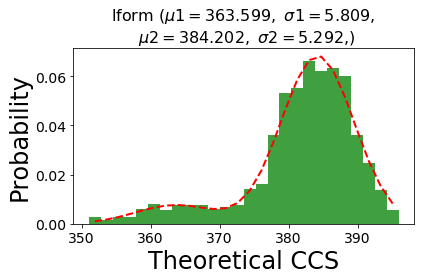

In [47]:
def neurosesin_p2():
    prefix = "neurosesin_p2_"
    titlenames = ["d11trp", ]
    #titlenames = ["d16lys", "d1ser", "lform"]
    ccstypes = ["_pa", ]
    typename = "_pa"
    colornames = ['blue', ]
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        #plt.xlim(xmin = 600, xmax = 680)
        #plt.ylim(ymin = 0, ymax = 0.06)
        expected=(338,2,0.1,345,2,0.1)
        plotfig3_bimodal(filename, titlename, graphname, color, 0, expected)
        
    titlenames = ["lform", ]
    colornames = [ 'green',]
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        #plt.xlim(xmin = 600, xmax = 680)
        #plt.ylim(ymin = 0, ymax = 0.06)
        expected=(360,2,0.1,385,2,0.1)
        plotfig3_bimodal(filename, titlename, graphname, color, 0, expected)

neurosesin_p2()

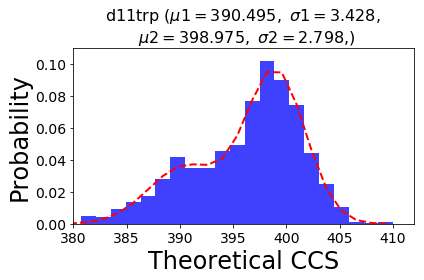

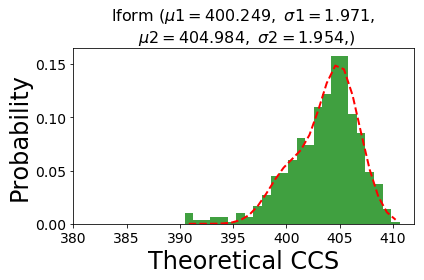

In [58]:
def neurosesin_p3():
    prefix = "neurosesin_p3_"
    titlenames = ["d11trp", ]
    #titlenames = ["d16lys", "d1ser", "lform"]
    ccstypes = ["_pa", ]
    typename = "_pa"
    colornames = ['blue', ]
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        plt.xlim(xmin = 380, xmax = 412)
        plt.ylim(ymin = 0, ymax = 0.11)
        expected=(390,2,0.1,400,2,0.1)
        plotfig3_bimodal(filename, titlename, graphname, color, 0, expected)
        
    titlenames = ["lform", ]
    colornames = [ 'green',]
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        plt.xlim(xmin = 380, xmax = 412)
        plt.ylim(ymin = 0, ymax = 0.165)
        expected=(400,2,0.1,405,2,0.1)
        plotfig3_bimodal(filename, titlename, graphname, color, 390, expected)

neurosesin_p3()

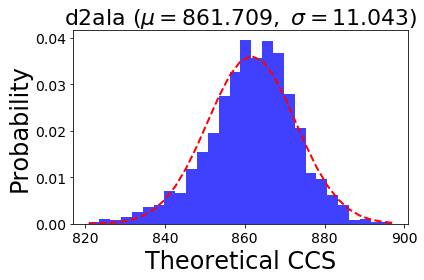

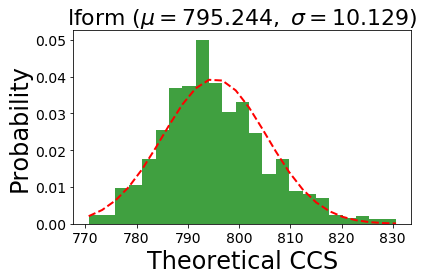

In [13]:
def gip_p4():
    titlenames = ["d2ala", "lform"]
    prefix = "gip_p4_"
    #titlenames = ["d16lys", "d1ser", "lform"]
    ccstypes = ["_tm", ]
    typename = "_tm"
    colornames = ['blue', 'green']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        #plt.xlim(xmin = 380, xmax = 412)
        #plt.ylim(ymin = 0, ymax = 0.11)
        #plotfig3_filter(filename, titlename, graphname, color, 1100, 900)
        plotfig3(filename, titlename, graphname, color)


gip_p4()




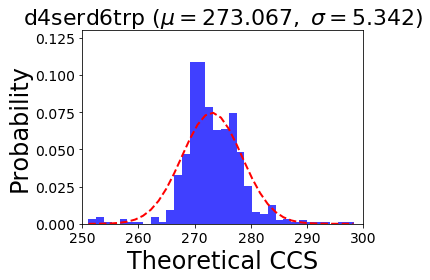

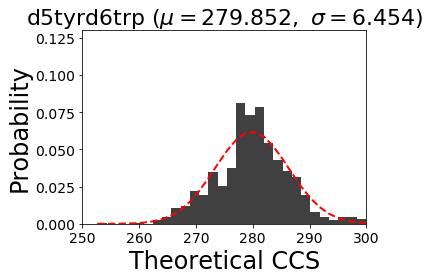

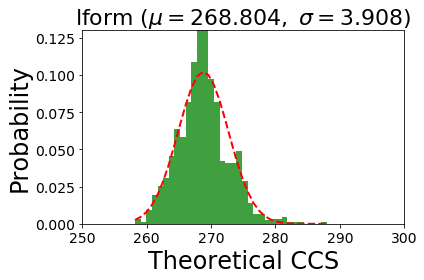

In [15]:
def lhrh_p2():
    prefix = "lhrh_p2_"
    titlenames = ["d4serd6trp", "d5tyrd6trp", "lform"]
    ccstypes = ["_pa", ]
    typename = "_pa"
    colornames = ['blue', 'black', 'green', 'orange', 'purple']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        plt.xlim(xmin = 250, xmax = 300)
        plt.ylim(ymin = 0, ymax = 0.13)
        plotfig3_filter(filename, titlename, graphname, color, 300, 250)

lhrh_p2()

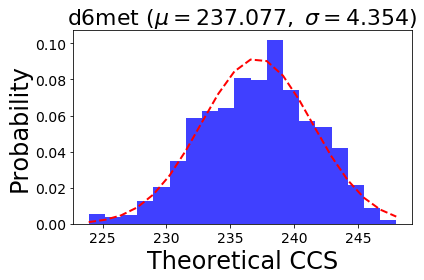

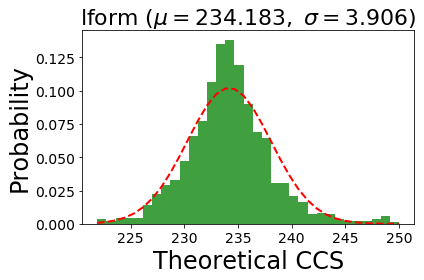

In [5]:
def wkymvm_p1():
    prefix = "wkymvm_p1_"
    titlenames = ["d6met", "lform"]
    ccstypes = ["_ehs", ]
    typename = "_ehs"
    colornames = ['blue', 'green']
    #figure_title = "acth-p5-d16lys"
    #plt.title(figure_title, fontsize = 20)

    #for titlename in titlenames: 
    for titlename, color in zip(titlenames, colornames): 
        filename = prefix + titlename + typename +  "_2.dat"
        graphname = prefix + titlename 
        #print(filename, graphname, graphname, color)
        #plt.xlim(xmin = 210, xmax = 240)
        #plt.ylim(ymin = 0, ymax = 0.125)
        plotfig3(filename, titlename, graphname, color)

wkymvm_p1()

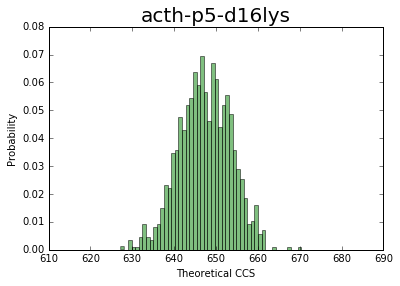

In [4]:

figure_title = "acth-p5-d16lys"
plt.title(figure_title, fontsize = 20)

with open("acth_p5_d16lys_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5, label='acth_p5_d16lys')
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.08)
pylab.xlim(610, 690)
plt.savefig("acthP5D16.tiff")


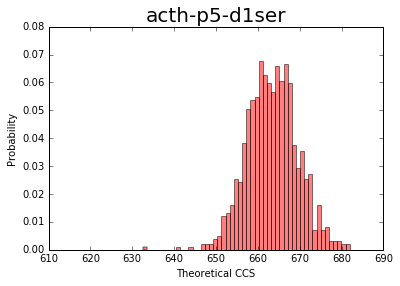

In [6]:
figure_title = "acth-p5-d1ser"
plt.title(figure_title, fontsize = 20)

with open("acth_p5_d1ser_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(610, 690)
pylab.ylim(0, 0.08)
plt.savefig("acthP5D1.tiff")


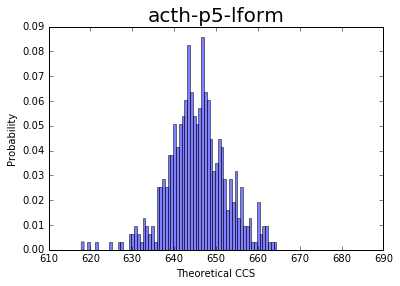

In [26]:
figure_title = "acth-p5-lform"
plt.title(figure_title, fontsize = 20)

with open("acth_p5_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 70
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.09)
pylab.xlim(610, 690)

plt.savefig("acthP5Lf.tiff")


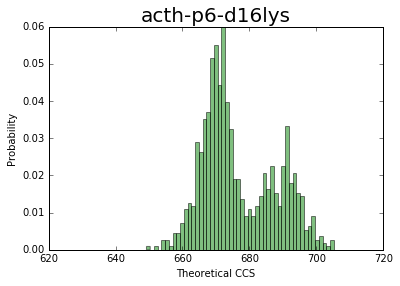

In [28]:

figure_title = "acth-p6-d16lys"
plt.title(figure_title, fontsize = 20)

with open("acth_p6_d16lys_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.06)
pylab.xlim(620, 720)


plt.savefig("acthP6D16.tiff")


(0, 0.08)

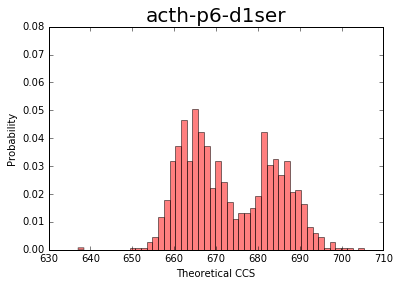

In [66]:

figure_title = "acth-p6-d1ser"
plt.title(figure_title, fontsize = 20)

with open("acth_p6_d1ser_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
plt.savefig("acthP6D1.tiff")
pylab.ylim(0, 0.08)

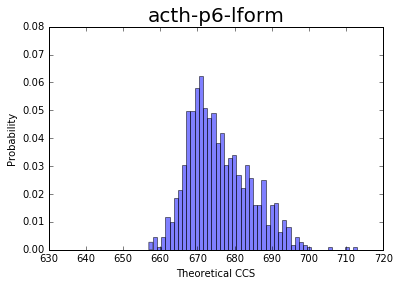

In [31]:
figure_title = "acth-p6-lform"
plt.title(figure_title, fontsize = 20)

with open("acth_p6_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(630, 720)
pylab.ylim(0, 0.08)
plt.savefig("acthP6Lf.tiff")


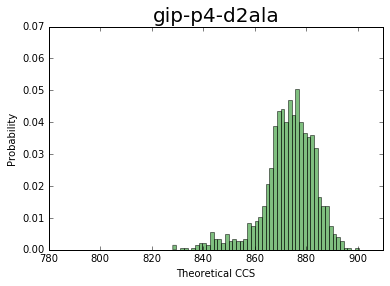

In [39]:
figure_title = "gip-p4-d2ala"
plt.title(figure_title, fontsize = 20)

with open("gip_p4_d2ala_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(780, 910)
pylab.ylim(0, 0.07)
plt.savefig("gipP4D2.tiff")


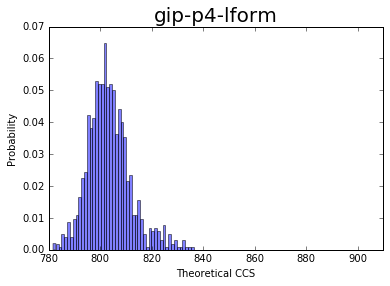

In [38]:
figure_title = "gip-p4-lform"
plt.title(figure_title, fontsize = 20)

with open("gip_p4_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(780, 910)
pylab.ylim(0, 0.07)
plt.savefig("gipP4Lf.tiff")

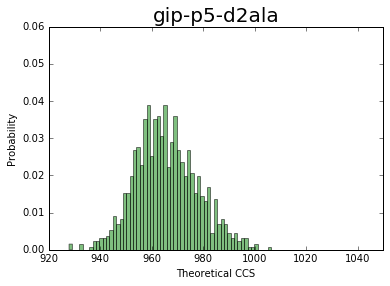

In [40]:
figure_title = "gip-p5-d2ala"
plt.title(figure_title, fontsize = 20)

with open("gip_p5_d2ala_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 60
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(920, 1050)
pylab.ylim(0, 0.06)
plt.savefig("gipP5D2.tiff")


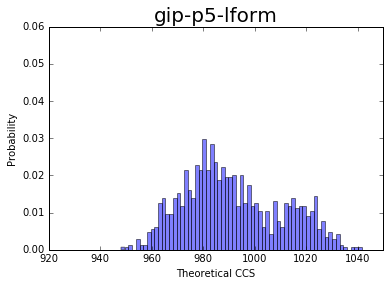

In [41]:
figure_title = "gip-p5-lform"
plt.title(figure_title, fontsize = 20)

with open("gip_p5_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 65
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(920, 1050)
pylab.ylim(0, 0.06)
plt.savefig("gipP5Lf.tiff")


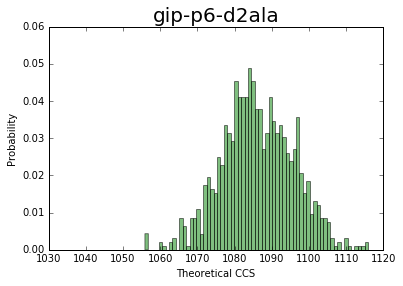

In [46]:
figure_title = "gip-p6-d2ala"
plt.title(figure_title, fontsize = 20)

with open("gip_p6_d2ala_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 65
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(1030, 1120)
pylab.ylim(0, 0.06)
plt.savefig("gipP6D2.tiff")


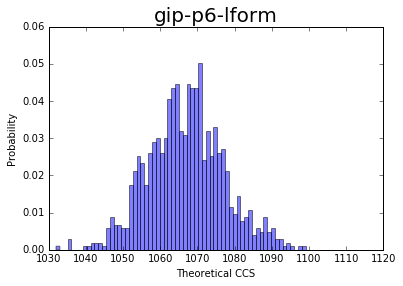

In [59]:
figure_title = "gip-p6-lform"
plt.title(figure_title, fontsize = 20)

with open("gip_p6_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 65
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.xlim(1030, 1120)
pylab.ylim(0, 0.06)
plt.savefig("gipP6Lf.tiff")

(0, 0.06)

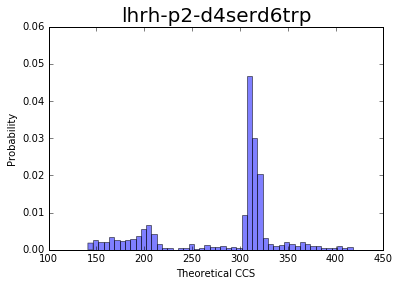

In [10]:
figure_title = "lhrh-p2-d4serd6trp"
plt.title(figure_title, fontsize = 20)

with open("lhrh_p2_d4serd6trp_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
plt.savefig("lhrhP2D4D6.tiff")
pylab.ylim(0, 0.06)

(0, 0.06)

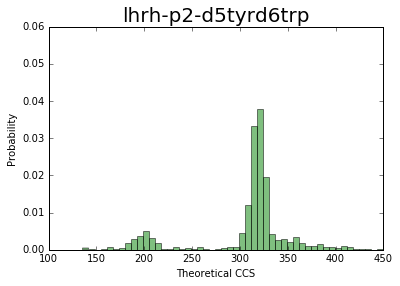

In [4]:
figure_title = "lhrh-p2-d5tyrd6trp"
plt.title(figure_title, fontsize = 20)

with open("lhrh_p2_d5tyrd6trp_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
plt.savefig("lhrhP2D5D6.tiff")
pylab.ylim(0, 0.06)

(0, 0.16)

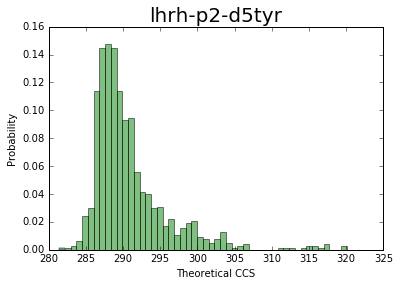

In [9]:
figure_title = "lhrh-p2-d5tyr"
plt.title(figure_title, fontsize = 20)

with open("lhrh_p2_d5tyr_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
plt.savefig("lhrhP2D5.tiff")
pylab.ylim(0, 0.16)

(0, 0.06)

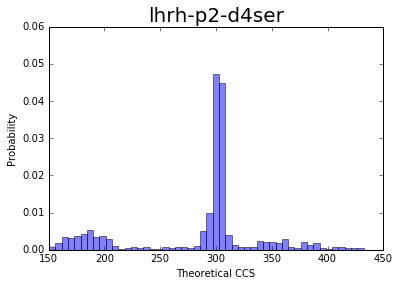

In [11]:
figure_title = "lhrh-p2-d4ser"
plt.title(figure_title, fontsize = 20)

with open("lhrh_p2_d4ser_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
plt.savefig("lhrhP2D4.tiff")
pylab.ylim(0, 0.06)

(0, 0.15)

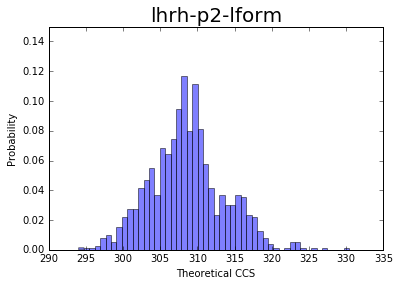

In [14]:
figure_title = "lhrh-p2-lform"
plt.title(figure_title, fontsize = 20)

with open("lhrh_p2_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.15)
plt.savefig("lhrhP2Lf.tiff")


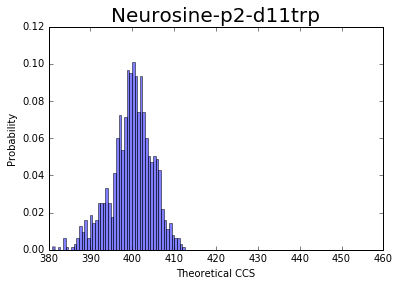

In [64]:
figure_title = "Neurosine-p2-d11trp"
plt.title(figure_title, fontsize = 20)

with open("neurosine_p2_d11trp_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.12)
pylab.xlim(380, 460)
plt.savefig("neuP2D11.tiff")

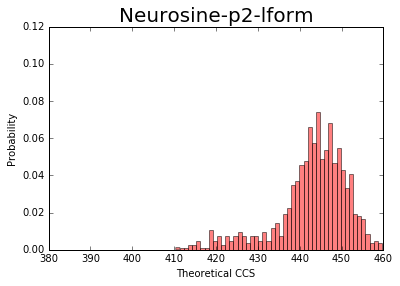

In [65]:
figure_title = "Neurosine-p2-lform"
plt.title(figure_title, fontsize = 20)

with open("neurosine_p2_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.12)
pylab.xlim(380, 460)
plt.savefig("neuP2Lf.tiff")

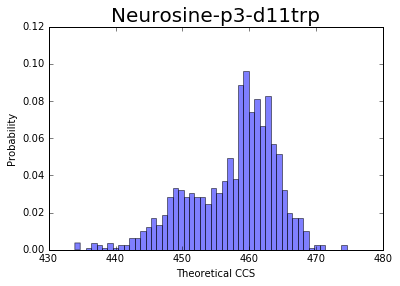

In [68]:
figure_title = "Neurosine-p3-d11trp"
plt.title(figure_title, fontsize = 20)

with open("neurosine_p3_d11trp_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.12)
pylab.xlim(430, 480)
plt.savefig("neuP3D11.tiff")

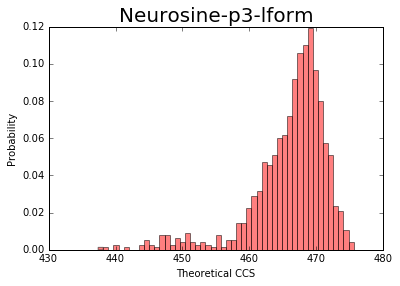

In [69]:
figure_title = "Neurosine-p3-lform"
plt.title(figure_title, fontsize = 20)

with open("neurosine_p3_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
pylab.ylim(0, 0.12)
pylab.xlim(430, 480)
plt.savefig("neuP3Lf.tiff")

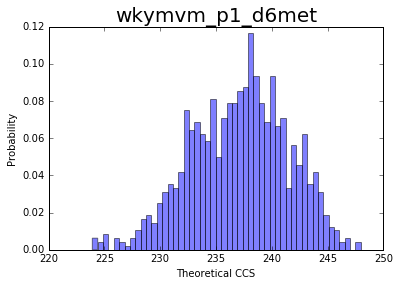

In [72]:
figure_title = "wkymvm_p1_d6met"
plt.title(figure_title, fontsize = 20)

with open("wkymvm_p1_d6met_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
#pylab.ylim(0, 0.12)
#pylab.xlim(430, 480)
plt.savefig("wkymvmP1D6.tiff")

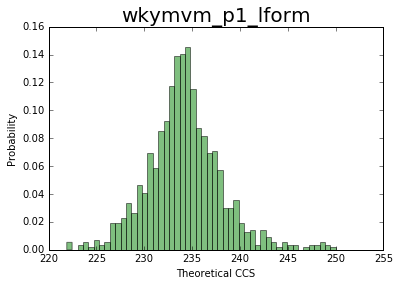

In [73]:
figure_title = "wkymvm_p1_lform"
plt.title(figure_title, fontsize = 20)

with open("wkymvm_p1_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
#pylab.ylim(0, 0.12)
#pylab.xlim(430, 480)
plt.savefig("wkymvmP1Lf.tiff")

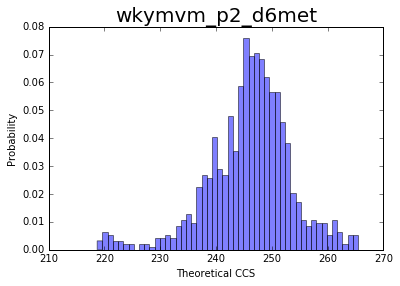

In [74]:
figure_title = "wkymvm_p2_d6met"
plt.title(figure_title, fontsize = 20)

with open("wkymvm_p2_d6met_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
#pylab.ylim(0, 0.12)
#pylab.xlim(430, 480)
plt.savefig("wkymvmP2D6.tiff")

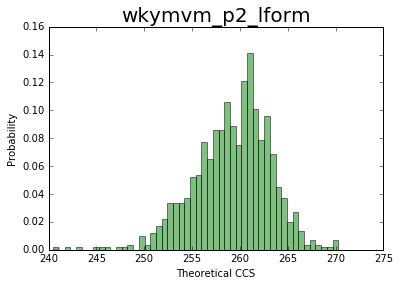

In [75]:
figure_title = "wkymvm_p2_lform"
plt.title(figure_title, fontsize = 20)

with open("wkymvm_p2_lform_ccs.dat") as f:
    acthP5D16 = np.loadtxt(f)
acthP5D16.sort()
num_bins = 50
n, bins, patches = plt.hist(acthP5D16, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Theoretical CCS')
plt.ylabel('Probability')
#pylab.ylim(0, 0.12)
#pylab.xlim(430, 480)
plt.savefig("wkymvmP2Lf.tiff")